<h3>Functions</h3>

In [1]:
import cv2

# Rotate an image
def rotate_image(image, angle, expand=True):

    # calculate image center
    height, width = image.shape[:2]
    center = (width // 2, height // 2)

    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    if expand:
        # Calculate the new dimensions to accommodate the rotated image
        cos_theta = abs(rotation_matrix[0, 0])
        sin_theta = abs(rotation_matrix[0, 1])
        new_width = int((height * sin_theta) + (width * cos_theta))
        new_height = int((height * cos_theta) + (width * sin_theta))

        # Adjust the rotation matrix to account for translation
        rotation_matrix[0, 2] += (new_width / 2) - center[0]
        rotation_matrix[1, 2] += (new_height / 2) - center[1]

        # Apply the rotation matrix to the image with new dimensions
        rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))
    else:
        # Apply the rotation matrix to the image with original dimensions
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image, rotation_matrix, center

In [52]:
import numpy as np
def rotate_points(points, angle, original_center, new_center):

    # Convert angle from degrees to radians
    angle_rad = np.radians(angle)

    rotated_points = []
    
    for x, y in points:
        # Translate point to origin (rotation center)
        translated_point = (x - original_center[0], y - original_center[1])
        
        # Rotate point
        rotated_point_x = (translated_point[0] * np.cos(angle_rad)) - (translated_point[1] * np.sin(angle_rad))
        rotated_point_y = (translated_point[0] * np.sin(angle_rad)) + (translated_point[1] * np.cos(angle_rad))
        
        # Translate point back and adjust for new image center
        final_point_x = int(rotated_point_x + new_center[0])
        final_point_y = int(rotated_point_y + new_center[1])
                
        # Convert the rotated point back to tuple and append to the list
        rotated_points.append([final_point_x, final_point_y])
    
    return rotated_points

(9522, 10140) (11138, 11639)
[[-9.84807753e-01  1.73648178e-01  9.98573633e+03]
 [-1.73648178e-01 -9.84807753e-01  1.11380660e+04]] (5070, 4761)


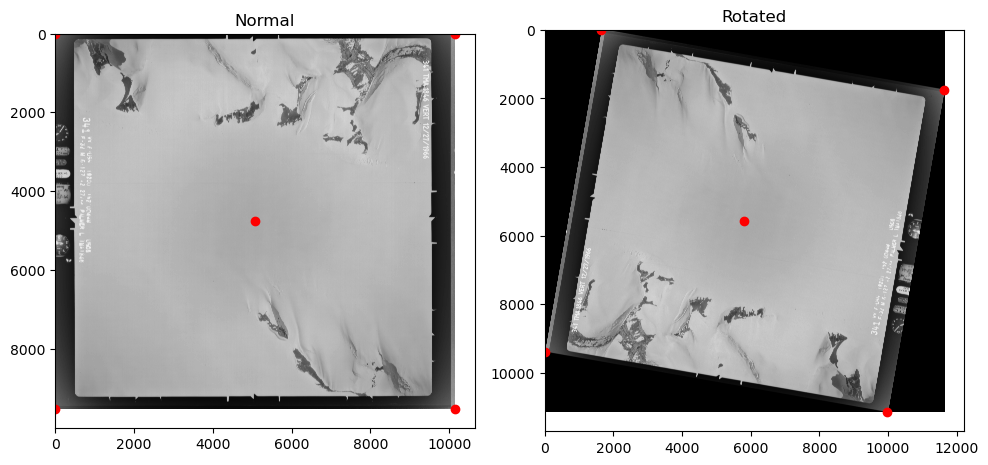

[0, 0] [0.0, 9377]
[10140, 0] [9986.0, 11138]
[10140, 9522] [11639.0, 1760]
[0, 9522] [1654.0, 0]
[5070.0, 4761.0] [5820.0, 5569]


In [53]:
import src.load.load_image as li
import matplotlib.pyplot as plt
import cv2

angle = 170

# load image and rotate
img = li.load_image("C:/Users/Felix/Desktop/CA184632V0341.tif")
img_rotated, matrix, center = rotate_image(img, angle)

img_rotated_center = (img_rotated.shape[1] / 2, img_rotated.shape[0] / 2)

print(img.shape, img_rotated.shape)

print(matrix, center)

# create example points
points = [
    [0,0], # top left
    [img.shape[1], 0], # top right
    [img.shape[1], img.shape[0]], # bottom right
    [0, img.shape[0]], # bottom left
    [img.shape[1]/2, img.shape[0]/2] # center
]
rotated_points = rotate_points(points, angle, center, img_rotated_center)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Normal')

axes[1].imshow(img_rotated, cmap='gray')
axes[1].set_title('Rotated')

# Plot the points on both images
for point in points:
    axes[0].plot(point[0], point[1], 'ro')  # 'ro' represents a red dot for the point

for point in rotated_points:
    x_adapt = img_rotated.shape[1] - point[0]
    axes[1].plot(x_adapt, point[1], 'ro')

plt.tight_layout()
plt.show()

for i in range(len(points)):
    print(points[i], rotated_points[i])


[[306.0, 3754], [9835.0, 286], [13091.0, 9235], [3563.0, 12702], [6699.0, 6494]]


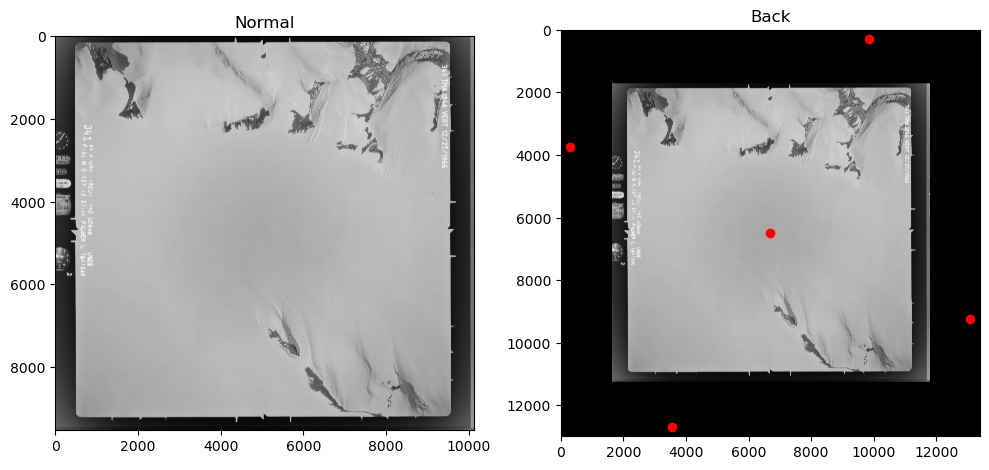

(9522, 10140) (12989, 13396)


In [54]:
img_back, matrix_back, center_back = rotate_image(img_rotated, -angle)

back_center = (img_back.shape[1] / 2, img_back.shape[0] / 2)


points_back = rotate_points(rotated_points, -angle, img_rotated_center, back_center)
print(points_back)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Normal')

axes[1].imshow(img_back, cmap='gray')
axes[1].set_title('Back')

for point in points_back:
    axes[1].plot(point[0], point[1], 'ro')


plt.tight_layout()
plt.show()

print(img.shape, img_back.shape)
